In [1]:
from __future__ import division, print_function
from functools import partial, reduce
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore
import fitpack
import interface
import obslib.sidis.reader
from qcdlib.auxiliary import AUX
from tools.config import conf
from qcdlib.core import CORE
from qcdlib.interpolator import INTERPOLATOR
from tools.config import conf
from qcdlib.gk0 import GK
from qcdlib.auxiliary import AUX
%matplotlib inline

/Users/avp5627/GIT/collinearity


In [2]:
conf['aux']  = AUX()
GK().get_gk(10.)

GK().get_state()

(-0.3, 1.3)

In [3]:
GK().setup()
GK().get_pertsud(2.)

-0.04177418010503535

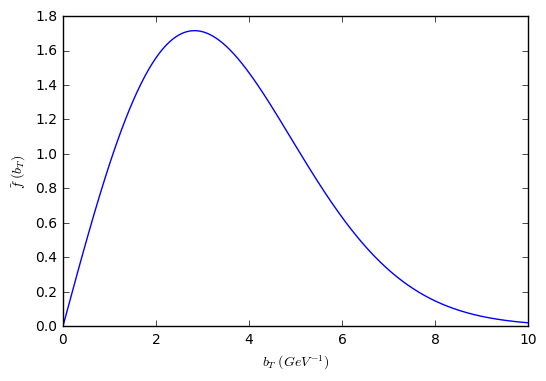

In [18]:
bt = np.arange(0,10,0.01)
tmd = bt * np.exp(-bt * bt * 0.25 /4)
fig, ax = plt.subplots()
ax.plot(bt,tmd,"-")
ax.set_xlabel(r"$b_T \;  (GeV^{-1})$")
ax.set_ylabel(r"$ \~{f}\; (b_T)$")
plt.savefig("../Figs/tmd_shape.pdf")

In [ ]:
from scipy.special import j0 as j0
bt = np.arange(0,15,0.01)
tmd = bt * j0(bt * 2) * np.exp(-bt * bt * 0.25 /4)
plt.plot(bt,tmd,"-")

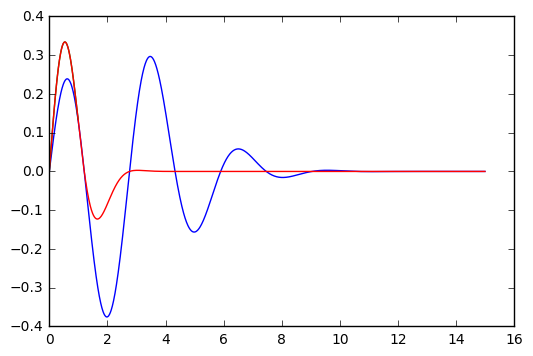

In [14]:
from scipy.special import j0 as j0

def ktilde1(bt):
        return np.exp(-0.5 * bt * bt)

def ktilde2(bt):
    return np.exp(-0.5)


bt = np.arange(0,15,0.01)
bt1 = np.arange(0,1,0.01)
bt2 = np.arange(1,15,0.01)
def tmd_lowbt(bt):
    return bt * j0(bt * 2) * ktilde1(bt) *np.exp(-bt * bt * 0.25 /4)
def tmd_largebt(bt):
    return bt * j0(bt * 2) * ktilde2(bt) *np.exp(-bt * bt * 0.25 /4)

plt.plot(bt,tmd_largebt(bt),"-")
plt.plot(bt1,tmd_lowbt(bt1),"-")
plt.plot(bt,tmd_lowbt(bt),"-")

Let us compare our results to Torino

In [43]:
from qcdlib.pdf0 import PDF
from qcdlib.core import CORE

In [45]:
x = 0.1
Q2 = 5.69
x * PDF().get_C(x, Q2)

array([  1.40752489e+00,   5.74201370e-01,   9.89016765e-02,
         4.04032559e-01,   1.23166245e-01,   5.47097402e-02,
         5.47097402e-02,   1.71601092e-02,   1.71601092e-02,
         3.35340605e-06,   3.35340605e-06])

In [46]:
PDF().get_C(x, Q2)[0]

14.075248886837352

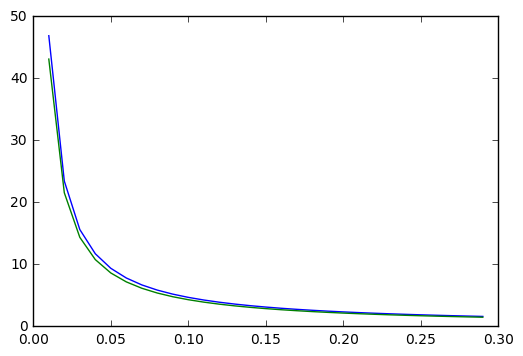

In [52]:
x = np.arange(0.01,0.3,0.01)
Q2 = 10
plt.plot(x,PDF().get_C(x, Q2)[1],"-") # up quarks
plt.plot(x,PDF().get_C(x, Q2)[3],"-") # down quark

My evolution:

In [53]:
from qcdlib.gk0 import GK

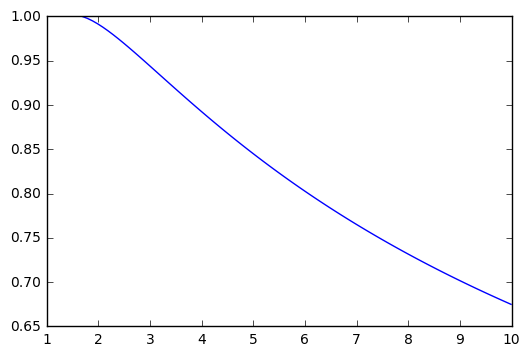

In [54]:
QQ2 = np.arange(1.69,10,0.1)
plt.plot(QQ2, GK().get_gk(QQ2)*np.exp(-GK().get_pertsud(QQ2)), "-")

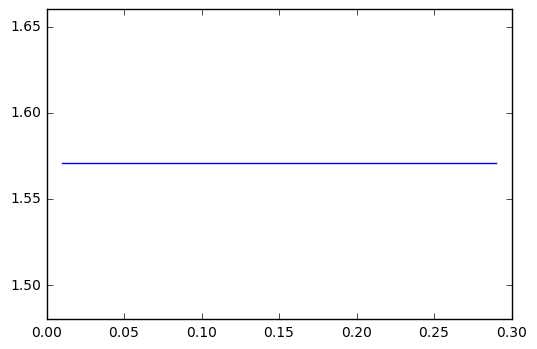

In [67]:
x = np.arange(0.01,0.3,0.01)
Q2 = 10.69
plt.plot(x,PDF().get_C(x, Q2)[1]/(PDF().get_C(x, 1.69)[1]*np.sqrt( GK().get_gk(Q2)*np.exp(-GK().get_pertsud(Q2))) ) ,"-") # up quark

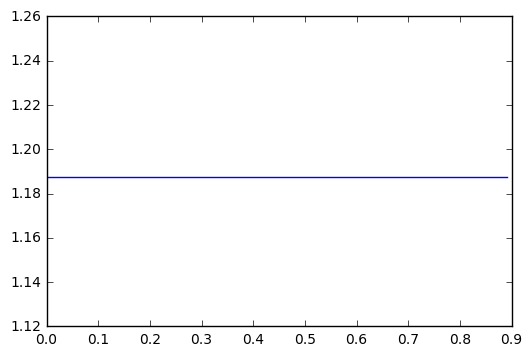

In [69]:
x = np.arange(0.001,0.9,0.01)
Q2 = 4.69
plt.plot(x,PDF().get_C(x, Q2)[1]/(PDF().get_C(x, 1.69)[1]) ,"-") # up quark

In [71]:
PDF().get_C(0.01, Q2)[1]/(PDF().get_C(0.01, 1.69)[1])

1.1500471479681913

In [159]:
xrange = np.arange(0.0037,0.41,0.001)
y = np.zeros(len(xrange))
y169 = np.zeros(len(xrange))
ytmd = np.zeros(len(xrange))

# Up quarks from CJ15 at Q2 = 5.
Q2 = 5
i = 0
for x in xrange:
    y[i] = x * PDF().get_C(x, Q2)[1]
    i=i+1

    
# Up quarks from CJ15 at Q2 = 1.69
Q20 = 1.69
i = 0
for x in xrange:
    y169[i] = x * PDF().get_C(x, Q20)[1]
    i=i+1    
    
    
# My evolution
i = 0
for x in xrange:
    ytmd[i] = y169[i] * np.sqrt( GK().get_gk(Q2) ) *np.exp(-GK().get_pertsud(Q2)/2)
    i=i+1 

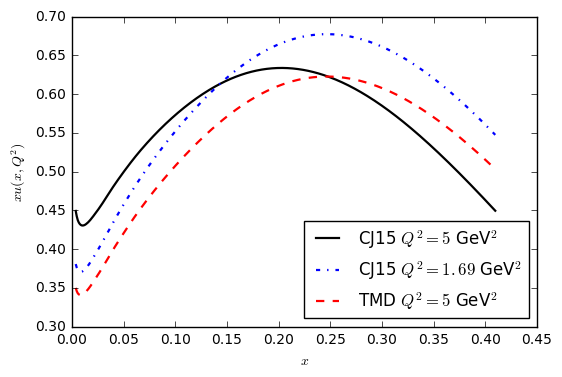

In [160]:
fig, ax = plt.subplots()
ax.plot(xrange,y,"k",linewidth=1.6, label='CJ15 $Q^2 = 5$ GeV$^2$')
ax.plot(xrange,y169,"b-.",linewidth=1.6, label='CJ15 $Q^2 = 1.69$ GeV$^2$')
ax.plot(xrange,ytmd,"r--",linewidth=1.6, label='TMD $Q^2 = 5$ GeV$^2$')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$x u(x, Q^2)$")
legend = ax.legend(loc='best', shadow=False)
plt.savefig("../Figs/tmd_comparison5.pdf")

In [161]:
xrange = np.arange(0.0037,0.41,0.001)
y3 = np.zeros(len(xrange))
y169 = np.zeros(len(xrange))
ytmd = np.zeros(len(xrange))

# Up quarks from CJ15 at Q2 = 5.
Q2 = 3
i = 0
for x in xrange:
    y3[i] = x * PDF().get_C(x, Q2)[1]
    i=i+1

    
# Up quarks from CJ15 at Q2 = 1.69
Q20 = 1.69
i = 0
for x in xrange:
    y169[i] = x * PDF().get_C(x, Q20)[1]
    i=i+1    
    
    
# My evolution
i = 0
for x in xrange:
    ytmd[i] = y169[i] * np.sqrt( GK().get_gk(Q2) ) *np.exp(-GK().get_pertsud(Q2)/2)
    i=i+1 

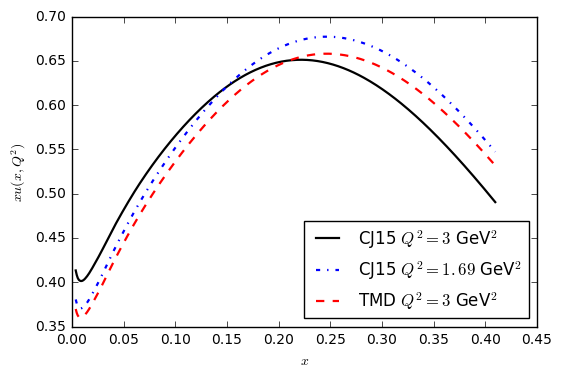

In [162]:
fig, ax = plt.subplots()
ax.plot(xrange,y3,"k",linewidth=1.6, label='CJ15 $Q^2 = 3$ GeV$^2$')
ax.plot(xrange,y169,"b-.",linewidth=1.6, label='CJ15 $Q^2 = 1.69$ GeV$^2$')
ax.plot(xrange,ytmd,"r--",linewidth=1.6, label='TMD $Q^2 = 3$ GeV$^2$')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$x u(x, Q^2)$")
legend = ax.legend(loc='best', shadow=False)
plt.savefig("../Figs/tmd_comparison3.pdf")

In [163]:
xrange = np.arange(0.0037,0.41,0.001)
y2 = np.zeros(len(xrange))
y169 = np.zeros(len(xrange))
ytmd = np.zeros(len(xrange))

# Up quarks from CJ15 at Q2 = 5.
Q2 = 2
i = 0
for x in xrange:
    y2[i] = x * PDF().get_C(x, Q2)[1]
    i=i+1

    
# Up quarks from CJ15 at Q2 = 1.69
Q20 = 1.69
i = 0
for x in xrange:
    y169[i] = x * PDF().get_C(x, Q20)[1]
    i=i+1    
    
    
# My evolution
i = 0
for x in xrange:
    ytmd[i] = y169[i] * np.sqrt( GK().get_gk(Q2) ) *np.exp(-GK().get_pertsud(Q2)/2)
    i=i+1 

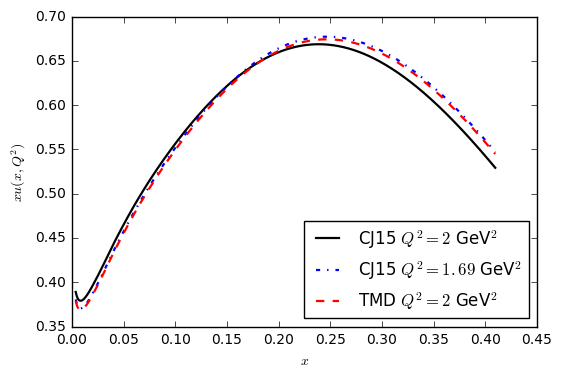

In [164]:
fig, ax = plt.subplots()
ax.plot(xrange,y2,"k",linewidth=1.6, label='CJ15 $Q^2 = 2$ GeV$^2$')
ax.plot(xrange,y169,"b-.",linewidth=1.6, label='CJ15 $Q^2 = 1.69$ GeV$^2$')
ax.plot(xrange,ytmd,"r--",linewidth=1.6, label='TMD $Q^2 = 2$ GeV$^2$')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$x u(x, Q^2)$")
legend = ax.legend(loc='best', shadow=False)
plt.savefig("../Figs/tmd_comparison2.pdf")

In [165]:
xrange = np.arange(0.0037,0.41,0.001)
y9 = np.zeros(len(xrange))
y169 = np.zeros(len(xrange))
ytmd = np.zeros(len(xrange))

# Up quarks from CJ15 at Q2 = 5.
Q2 = 9
i = 0
for x in xrange:
    y9[i] = x * PDF().get_C(x, Q2)[1]
    i=i+1

    
# Up quarks from CJ15 at Q2 = 1.69
Q20 = 1.69
i = 0
for x in xrange:
    y169[i] = x * PDF().get_C(x, Q20)[1]
    i=i+1    
    
    
# My evolution
i = 0
for x in xrange:
    ytmd[i] = y169[i] * np.sqrt( GK().get_gk(Q2) ) *np.exp(-GK().get_pertsud(Q2)/2)
    i=i+1 

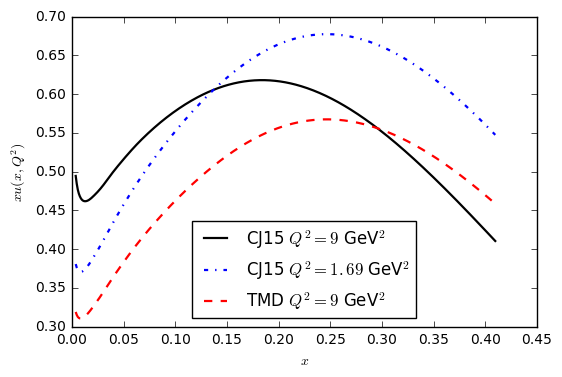

In [166]:
fig, ax = plt.subplots()
ax.plot(xrange,y9,"k",linewidth=1.6, label='CJ15 $Q^2 = 9$ GeV$^2$')
ax.plot(xrange,y169,"b-.",linewidth=1.6, label='CJ15 $Q^2 = 1.69$ GeV$^2$')
ax.plot(xrange,ytmd,"r--",linewidth=1.6, label='TMD $Q^2 = 9$ GeV$^2$')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$x u(x, Q^2)$")
legend = ax.legend(loc='best', shadow=False)
plt.savefig("../Figs/tmd_comparison9.pdf")

In [167]:
from qcdlib.ff0 import FF
from qcdlib.core import CORE

In [170]:
x = 0.1
Q2 = 5.69
x * FF('pi').get_C(x, Q2)

array([ 0.7465753 ,  0.63965989,  0.55405127,  0.55404683,  0.70885737,
        0.50441   ,  0.50441   ,  0.47284465,  0.47284465, -0.00212163,
       -0.00212163])

In [179]:
xrange = np.arange(0.2,0.6,0.001)
y = np.zeros(len(xrange))
y169 = np.zeros(len(xrange))
ytmd = np.zeros(len(xrange))

# Up quarks from CJ15 at Q2 = 5.
Q2 = 5
i = 0
for x in xrange:
    y[i] = x * FF('pi').get_C(x, Q2)[1]
    i=i+1

    
# Up quarks from CJ15 at Q2 = 1.69
Q20 = 1.69
i = 0
for x in xrange:
    y169[i] = x * FF('pi').get_C(x, Q20)[1]
    i=i+1    
    
    
# My evolution
i = 0
for x in xrange:
    ytmd[i] = y169[i] * np.sqrt( GK().get_gk(Q2) ) *np.exp(-GK().get_pertsud(Q2)/2)
    i=i+1 

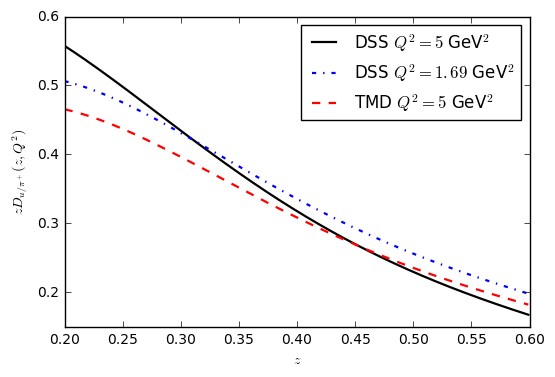

In [180]:
fig, ax = plt.subplots()
ax.plot(xrange,y,"k",linewidth=1.6, label='DSS $Q^2 = 5$ GeV$^2$')
ax.plot(xrange,y169,"b-.",linewidth=1.6, label='DSS $Q^2 = 1.69$ GeV$^2$')
ax.plot(xrange,ytmd,"r--",linewidth=1.6, label='TMD $Q^2 = 5$ GeV$^2$')
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$z D_{u/\pi^+}(z, Q^2)$")
legend = ax.legend(loc='best', shadow=False)
plt.savefig("../Figs/tmdff_comparison5.pdf")

In [176]:
xrange = np.arange(0.2,0.6,0.001)
y = np.zeros(len(xrange))
y169 = np.zeros(len(xrange))
ytmd = np.zeros(len(xrange))

# Up quarks from CJ15 at Q2 = 5.
Q2 = 3
i = 0
for x in xrange:
    y[i] = x * FF('pi').get_C(x, Q2)[1]
    i=i+1

    
# Up quarks from CJ15 at Q2 = 1.69
Q20 = 1.69
i = 0
for x in xrange:
    y169[i] = x * FF('pi').get_C(x, Q20)[1]
    i=i+1    
    
    
# My evolution
i = 0
for x in xrange:
    ytmd[i] = y169[i] * np.sqrt( GK().get_gk(Q2) ) *np.exp(-GK().get_pertsud(Q2)/2)
    i=i+1 

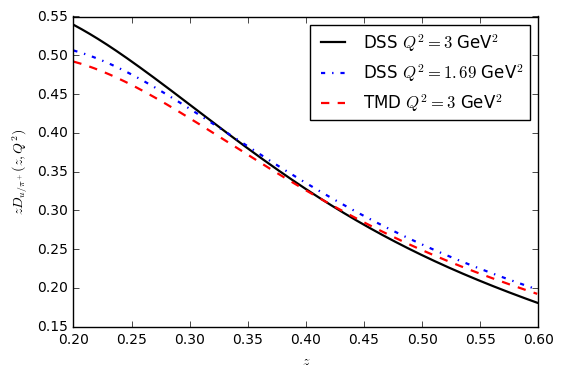

In [178]:
fig, ax = plt.subplots()
ax.plot(xrange,y,"k",linewidth=1.6, label='DSS $Q^2 = 3$ GeV$^2$')
ax.plot(xrange,y169,"b-.",linewidth=1.6, label='DSS $Q^2 = 1.69$ GeV$^2$')
ax.plot(xrange,ytmd,"r--",linewidth=1.6, label='TMD $Q^2 = 3$ GeV$^2$')
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$z D_{u/\pi^+}(z, Q^2)$")
legend = ax.legend(loc='best', shadow=False)
plt.savefig("../Figs/tmdff_comparison3.pdf")

In [181]:
xrange = np.arange(0.2,0.6,0.001)
y = np.zeros(len(xrange))
y169 = np.zeros(len(xrange))
ytmd = np.zeros(len(xrange))

# Up quarks from CJ15 at Q2 = 5.
Q2 = 9
i = 0
for x in xrange:
    y[i] = x * FF('pi').get_C(x, Q2)[1]
    i=i+1

    
# Up quarks from CJ15 at Q2 = 1.69
Q20 = 1.69
i = 0
for x in xrange:
    y169[i] = x * FF('pi').get_C(x, Q20)[1]
    i=i+1    
    
    
# My evolution
i = 0
for x in xrange:
    ytmd[i] = y169[i] * np.sqrt( GK().get_gk(Q2) ) *np.exp(-GK().get_pertsud(Q2)/2)
    i=i+1 

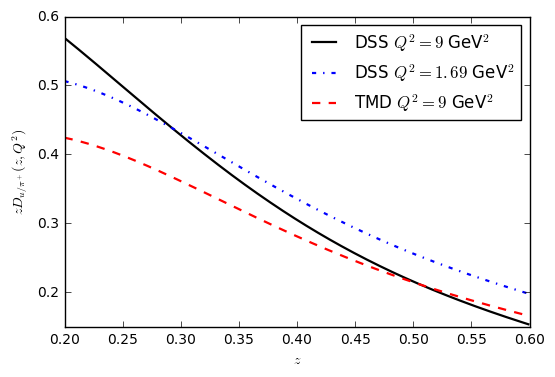

In [182]:
fig, ax = plt.subplots()
ax.plot(xrange,y,"k",linewidth=1.6, label='DSS $Q^2 = 9$ GeV$^2$')
ax.plot(xrange,y169,"b-.",linewidth=1.6, label='DSS $Q^2 = 1.69$ GeV$^2$')
ax.plot(xrange,ytmd,"r--",linewidth=1.6, label='TMD $Q^2 = 9$ GeV$^2$')
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$z D_{u/\pi^+}(z, Q^2)$")
legend = ax.legend(loc='best', shadow=False)
plt.savefig("../Figs/tmdff_comparison9.pdf")

In [183]:
xrange = np.arange(0.2,0.6,0.001)
y = np.zeros(len(xrange))
y169 = np.zeros(len(xrange))
ytmd = np.zeros(len(xrange))

# Up quarks from CJ15 at Q2 = 5.
Q2 = 2
i = 0
for x in xrange:
    y[i] = x * FF('pi').get_C(x, Q2)[1]
    i=i+1

    
# Up quarks from CJ15 at Q2 = 1.69
Q20 = 1.69
i = 0
for x in xrange:
    y169[i] = x * FF('pi').get_C(x, Q20)[1]
    i=i+1    
    
    
# My evolution
i = 0
for x in xrange:
    ytmd[i] = y169[i] * np.sqrt( GK().get_gk(Q2) ) *np.exp(-GK().get_pertsud(Q2)/2)
    i=i+1 

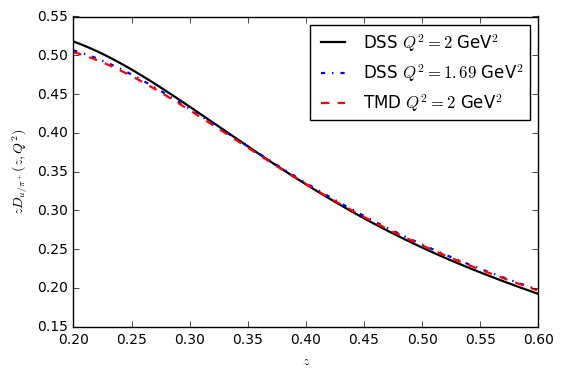

In [184]:
fig, ax = plt.subplots()
ax.plot(xrange,y,"k",linewidth=1.6, label='DSS $Q^2 = 2$ GeV$^2$')
ax.plot(xrange,y169,"b-.",linewidth=1.6, label='DSS $Q^2 = 1.69$ GeV$^2$')
ax.plot(xrange,ytmd,"r--",linewidth=1.6, label='TMD $Q^2 = 2$ GeV$^2$')
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$z D_{u/\pi^+}(z, Q^2)$")
legend = ax.legend(loc='best', shadow=False)
plt.savefig("../Figs/tmdff_comparison2.pdf")